In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("data.csv")
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

# Target

Basic     8735
Luxury    1265
Name: category, dtype: int64
Basic     0.8735
Luxury    0.1265
Name: category, dtype: float64


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


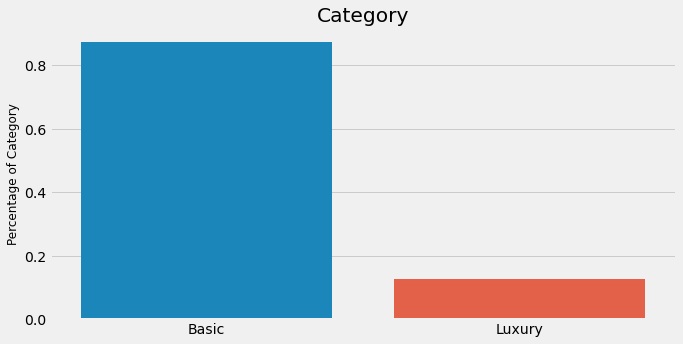

In [4]:
print(df.category.value_counts())
target = df.category.value_counts(normalize=True) 
print(target)
plt.figure(figsize=(10,5))
sns.barplot(target.index, target.values)
plt.title('Category')
plt.ylabel('Percentage of Category', fontsize=12);

In [5]:
df['category'] = df.category.astype(str)
df['Luxury'] = np.where(df.category == "Luxury", 1, 0)
df.Luxury.value_counts()

0    8735
1    1265
Name: Luxury, dtype: int64

In [6]:
df['PricePerSquareMeters']=df['price']/df['squareMeters']

In [7]:
df['YearsOld']=2021-df['made']

In [8]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,Luxury,PricePerSquareMeters,YearsOld
0,75523,3,0,1,63,9373,3,8,2005,0,...,4313,9005,956,0,7,7559081.5,Basic,0,100.089794,16
1,80771,39,1,1,98,39381,8,6,2015,1,...,3653,2436,128,1,2,8085989.5,Luxury,1,100.110058,6
2,55712,58,0,1,19,34457,6,8,2021,0,...,2937,8852,135,1,9,5574642.1,Basic,0,100.061784,0
3,32316,47,0,0,6,27939,10,4,2012,0,...,659,7141,359,0,3,3232561.2,Basic,0,100.029744,9
4,70429,19,1,1,90,38045,3,7,1990,1,...,8435,2429,292,1,4,7055052.0,Luxury,1,100.172543,31


In [9]:
df.to_csv('data_cleaning.csv')